# [kaggleのタイタニック]

以下、今回の解析で重要なものについて。
+ Survived ... 1 -> 生存者(Alive), 0 ->死者(Dead)
+ Pclass ... 1,2,3の順に高級クラスの客室
+ Sex,Age ... それぞれ性別と年齢
+ SibSp ... 兄弟および配偶者の数
+ Parch ... 親もしくは子供の数
+ ticket... チケット番号
+ Fare ... 運賃
+ Embarked ... 乗船した港（３つ）

## 1. 必要なもののインポートとCSVファイルの読み込み

In [30]:
# 必要なものをインポートする
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# jupyter-notebookに描画するためのおまじない
%matplotlib inline

In [31]:
# csvを読み込み、文字の変換を行う
titanic_df= pd.read_csv("train.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
titanic_df["Age"].fillna(titanic_df.Age.mean(), inplace=True) 

test= pd.read_csv("test.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test["Age"].fillna(test.Age.mean(), inplace=True) 

In [32]:
combine1 = [titanic_df]

for titanic_df in combine1: 
        titanic_df['Salutation'] = titanic_df['Name'].str.extract(' ([A-Za-z]+).', expand=False) 
for titanic_df in combine1: 
        titanic_df['Salutation'] = titanic_df['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        titanic_df['Salutation'] = titanic_df['Salutation'].replace('Mlle', 'Miss')
        titanic_df['Salutation'] = titanic_df['Salutation'].replace('Ms', 'Miss')
        titanic_df['Salutation'] = titanic_df['Salutation'].replace('Mme', 'Mrs')
#        del titanic_df['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
for titanic_df in combine1: 
        titanic_df['Salutation'] = titanic_df['Salutation'].map(Salutation_mapping) 
        titanic_df['Salutation'] = titanic_df['Salutation'].fillna(0)

In [33]:
name_df_train = titanic_df['Name']
survive_array = titanic_df['Survived']

name_df = name_df_train

name_array = []
name_count = []
name_survive_count = []
name_survive_ratio = []

name_i = 0

for name in name_df:   
    name_split = name.split(" ") # 空白でスプリット
    name_split_first = name_split[0].replace(',','')  # カンマを削除
    if name_split_first in name_array:
        name_count[name_array.index(name_split_first)] = name_count[name_array.index(name_split_first)] + 1
        name_survive_count[name_array.index(name_split_first)] = name_survive_count[name_array.index(name_split_first)] + survive_array[name_i]                            
    else:
        name_array.append(name_split_first)
        name_count.append(1)
        name_survive_count.append(survive_array[name_i])
    name_i = name_i + 1
        
count = 0
for i in name_count:
    if name_count[count] == 1:
        name_survive_ratio.append(0)
    else:
        name_survive_ratio.append(name_survive_count[count]/(name_count[count]))
    count = count + 1
    
survive_ratio_array = []    

for name in name_df:
    name_split = name.split(" ")
    name_split_first = name_split[0].replace(',','')
    survive_ratio_array.append(name_survive_ratio[name_array.index(name_split_first)])



In [34]:
for titanic_df in combine1: 
        titanic_df['Ticket_Lett'] = titanic_df['Ticket'].apply(lambda x: str(x)[0])
        titanic_df['Ticket_Lett'] = titanic_df['Ticket_Lett'].apply(lambda x: str(x)) 
        titanic_df['Ticket_Lett'] = np.where((titanic_df['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), titanic_df['Ticket_Lett'], np.where((titanic_df['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        titanic_df['Ticket_Len'] = titanic_df['Ticket'].apply(lambda x: len(x)) 
        #del titanic_df['Ticket'] 
titanic_df['Ticket_Lett']=titanic_df['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)

In [35]:
for titanic_df in combine1: 
    titanic_df['Cabin_Lett'] = titanic_df['Cabin'].apply(lambda x: str(x)[0]) 
    titanic_df['Cabin_Lett'] = titanic_df['Cabin_Lett'].apply(lambda x: str(x)) 
    titanic_df['Cabin_Lett'] = np.where((titanic_df['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),titanic_df['Cabin_Lett'], np.where((titanic_df['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
#del titanic_df['Cabin'] 
titanic_df['Cabin_Lett']=titanic_df['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

In [36]:
del titanic_df['Name']
del titanic_df['Ticket']
del titanic_df['Cabin']
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett
0,1,0,3,0,22.0,1,0,7.2500,0.0,1.0,3,9,0
1,2,1,1,1,38.0,1,0,71.2833,1.0,3.0,0,8,1
2,3,1,3,1,26.0,0,0,7.9250,0.0,2.0,3,16,0
3,4,1,1,1,35.0,1,0,53.1000,0.0,3.0,1,6,1
4,5,0,3,0,35.0,0,0,8.0500,0.0,1.0,3,6,0


In [25]:
titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"] + 1
for titanic_df in combine1:
    titanic_df['IsAlone'] = 0
    titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

In [26]:
titanic_df['Embarked'].fillna("", inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Salutation     891 non-null float64
Ticket_Lett    891 non-null int64
Ticket_Len     891 non-null int64
Cabin_Lett     891 non-null int64
FamilySize     891 non-null int64
IsAlone        891 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 104.5+ KB


In [27]:
test["Age"].fillna(train.Age.mean(), inplace=True)
test["Fare"].fillna(train.Fare.mean(), inplace=True)

combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    test['Salutation'] = test['Salutation'].replace('Mlle', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Ms', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Mme', 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)

for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 

test["FamilySize"] = train["SibSp"] + train["Parch"] + 1

for test in combine:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
    
test_data = test.values
xs_test = test_data[:, 1:]

NameError: name 'train' is not defined

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [29]:
key =['Pclass','Sex','Age','SibSp','Parch','Fare','Salutation','IsAlone']
xs = titanic_df[key].values # Pclass以降の変数
y  = titanic_df['Survived']  # 正解データ
xs_test=test[key].values

KeyError: "['Salutation' 'IsAlone'] not in index"

In [14]:
xs_test=test[key].values

KeyError: "['Salutation' 'IsAlone'] not in index"

In [17]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(xs, y)
Y_pred = random_forest.predict(xs_test)

import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])

NameError: name 'xs_test' is not defined

In [16]:
# Kaggle Titanic predictions

# Importing libraries
import numpy as np
import pandas as pd

# Making the splits
training = pd.read_csv('train.csv')
X_train = training.iloc[:, [2, 4, 5, 6, 7, 9]].values
y_train = training.iloc[:, 1].values
testing = pd.read_csv('test.csv')
X_test = testing.iloc[:, [1, 3, 4, 5, 6, 8]].values

# Reshaping to a matrix
X_train = X_train.reshape(-1, 6)
X_test = X_test.reshape(-1, 6)

# Filling in missing data
from sklearn.preprocessing import Imputer
train_imputer = Imputer(missing_values = np.nan, strategy = 'mean', axis = 0)
train_imputer = train_imputer.fit(X_train[:, 2:3])
X_train[:, 2:3] = train_imputer.transform(X_train[:, 2:3])

test_imputer = Imputer(missing_values = np.nan, strategy = 'mean', axis = 0)
test_imputer = test_imputer.fit(X_test[:, 2:6])
X_test[:, 2:6] = test_imputer.transform(X_test[:, 2:6])

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X_train[:, 1] = labelencoder_X.fit_transform(X_train[:, 1])
X_test[:, 1] = labelencoder_X.transform(X_test[:, 1])

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 300, criterion = 'entropy')
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

/home/hide/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [1]:
# Kaggle Titanic predictions

# Importing libraries
import numpy as np
import pandas as pd

# Making the splits
training = pd.read_csv('train.csv')
X_train = training.iloc[:, [2, 4, 5, 6, 7, 9]].values
y_train = training.iloc[:, 1].values
testing = pd.read_csv('test.csv')
X_test = testing.iloc[:, [1, 3, 4, 5, 6, 8]].values

# Reshaping to a matrix
X_train = X_train.reshape(-1, 6)
X_test = X_test.reshape(-1, 6)

In [2]:
X_train

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', nan, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [278]:
X_train

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', nan, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [4]:
# キーを指定してほしい情報だけ出力する
valiables = ['Survived', 'Pclass', 'Sex', 'Age']
titanic_df2 = titanic_df[valiables]
titanic_df2.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [5]:
# 条件にマッチするデータを取り出す
titanic_df.query('(Age > 20) & (Sex == "female")').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
# 基本的な統計量の表示
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Survive列が0か1かで生存したかどうかを示している。
# 生存した人たちと、していない人たちで各値の平均をとってみる。
titanic_df.groupby(['Survived']).mean().reset_index()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


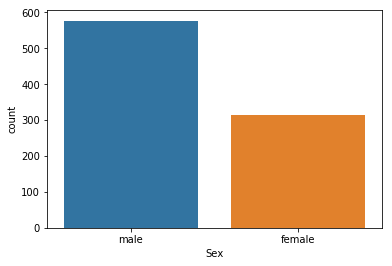

In [8]:
# 表を作成してデータの全体象をつかむ
sns.countplot('Sex', data=titanic_df)

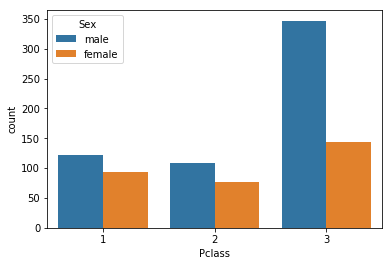

In [9]:
# ２値の数えて状況を表示する
sns.countplot('Pclass', data=titanic_df,hue='Sex')

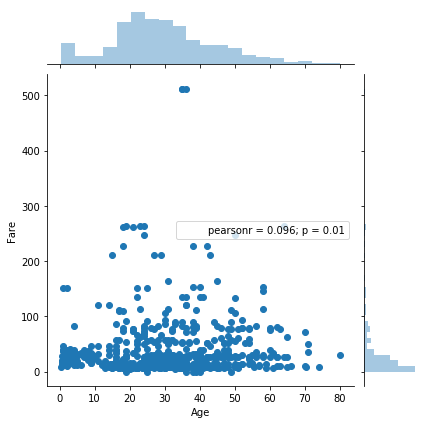

In [10]:
# 散布図を表示
sns.jointplot('Age', 'Fare', data=titanic_df)

In [27]:
# nulを埋めるために数を数える
titanic_df['Age'].isnull().sum()

177

In [29]:
# Ageがnulの全体を表示
titanic_df[titanic_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [118]:
# 数字以外で記載されているデータを数値に置換
titanic_df['Embarked'] = titanic_df['Embarked'].replace(['C', 'S', 'Q'], [0, 1, 2])
titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'], [0, 1])
titanic_df['Age'] = titanic_df['Age'].replace('NaN', 0)

In [119]:
# 数字以外に置換できないデータは削除
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [121]:
# データ毎の相関を作成する
corrmat = titanic_df.corr()
corrmat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


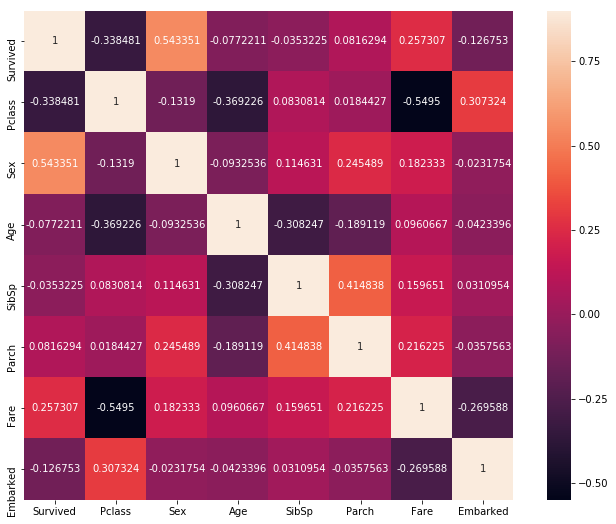

In [122]:
# 作った相関のヒートマップを作成する　※１行目はサイズを設定
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.9, square=True, annot=True, fmt='g')

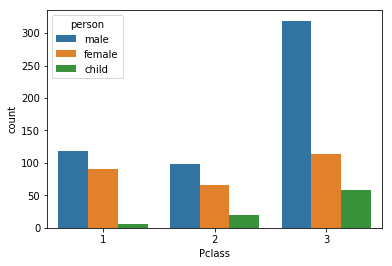

In [8]:
## numpyとseabornをインポート
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データには年齢の欄はあるが子供かどうかの欄はない
# ここでは10歳未満を子供とする

def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

# 男女と子供にわけたpersonという新しい列を追加
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

# 乗客数（生存者含む）をカウントする
sns.countplot('Pclass', data=titanic_df, hue='person')

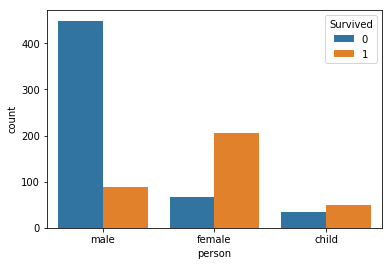

In [12]:
sns.countplot('person', data=titanic_df, hue='Survived')

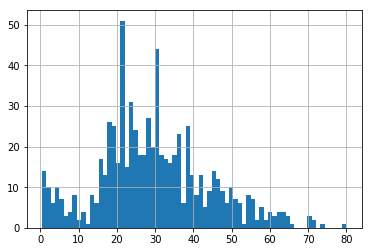

In [7]:
#年齢の分布を表示
titanic_df['Age'].hist(bins=70)

In [8]:
#平均を表示
titanic_df['Age'].mean()

29.69911764705882

In [9]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

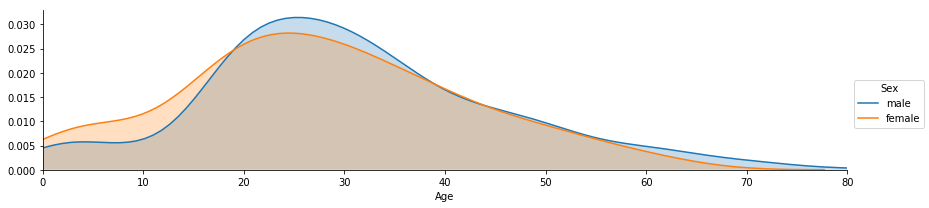

In [13]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

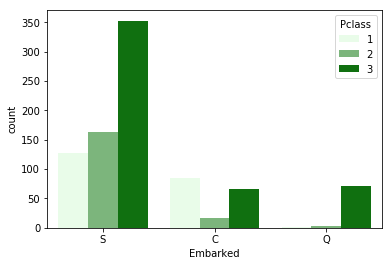

In [11]:
sns.countplot('Embarked', data=titanic_df, hue='Pclass', color ='g')

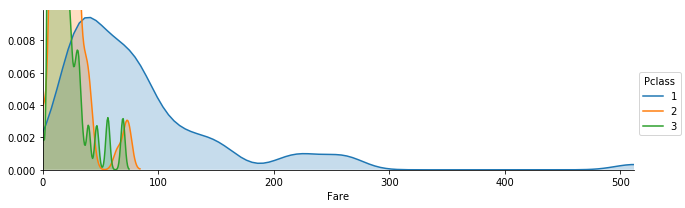

In [12]:
# FacetGridを使って客室クラス別の乗船費用の分布をみる
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=3)
fig.map(sns.kdeplot, 'Fare', shade=True)
highest = titanic_df['Fare'].max()
fig.set(xlim=(0,highest))
fig.add_legend()

In [13]:
titanic_df[titanic_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,female
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,male
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,male


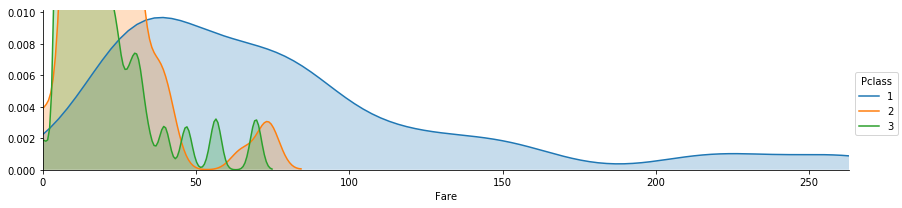

In [14]:
drop_idx = [258, 679, 737]
titanic_df2 = titanic_df.drop(drop_idx)

fig = sns.FacetGrid(titanic_df2, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Fare', shade=True)
highest = titanic_df2['Fare'].max()
fig.set(xlim=(0,highest))
fig.add_legend()

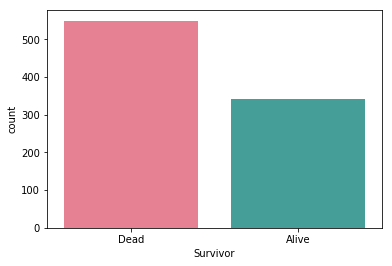

In [15]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'Dead', 1:'Alive'})
sns.countplot('Survivor', data=titanic_df, palette='husl')

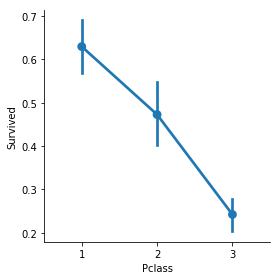

In [16]:
sns.factorplot('Pclass', 'Survived', data=titanic_df)

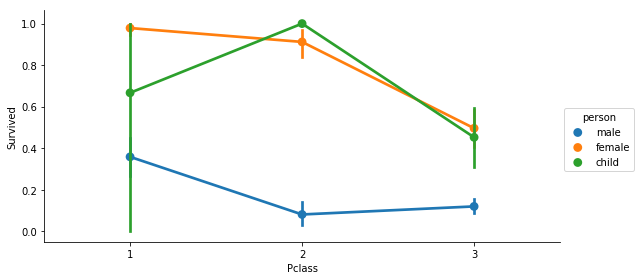

In [17]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df, aspect=2)

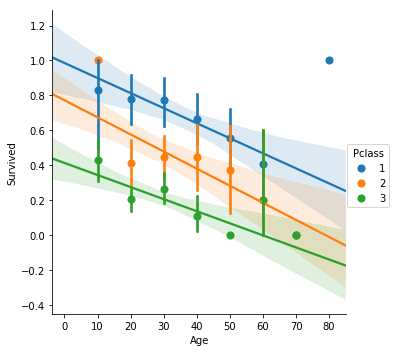

In [18]:
generations = [10,20,30,40,50,60,70,80]
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df,
           hue_order=[1,2,3], x_bins=generations)

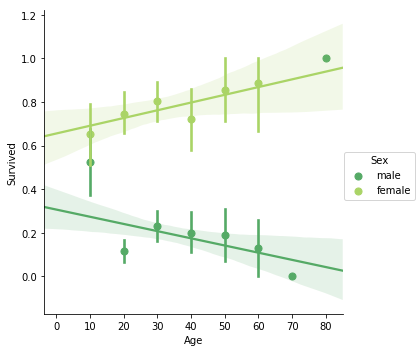

In [19]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='summer',
           x_bins=generations)